## Explore Data Analysis

In [3]:
#pip install WordCloud

In [27]:
#importación  de librerias standrad 
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from wordcloud import WordCloud
import pickle
warnings.filterwarnings('ignore')

### Proceso de Unión de los 3 DataSets: Games, Items y Reviews

In [5]:
with open("steamGames.pkl", "rb") as file:
    dataGames = pickle.load(file)
    
with open("steamItems.pkl", "rb") as file:
    dataItems = pickle.load(file)
    
with open("steamReviews.pkl", "rb") as file:
    dataReviews = pickle.load(file)
    

dataUser = pd.merge(dataItems,dataReviews,on=['user_id','item_id','user_url'],how='outer')
data = pd.merge(dataUser,dataGames,on='item_id',how='outer')

### Removiendo duplicados

In [6]:
#Veficando cantidad de filas duplicadas
print(f"Numero de filas duplicadas = {data.duplicated().sum()}")

Numero de filas duplicadas = 0


In [ ]:
#data = data.drop_duplicates()
#data.reset_index(drop=True,inplace=True)

In [7]:
#Visualización del Tipo de Dato de las Columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851692 entries, 0 to 10851691
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   item_id             object 
 1   item_name           object 
 2   playtime_forever    float64
 3   playtime_2weeks     float64
 4   steam_id            object 
 5   items_count         float64
 6   user_id             object 
 7   user_url            object 
 8   posted              object 
 9   recommend           object 
 10  sentiment_analysis  float64
 11  genres              object 
 12  publisher           object 
 13  app_name            object 
 14  title               object 
 15  price               float64
 16  developer           object 
 17  release_year        Int64  
 18  free_play           object 
dtypes: Int64(1), float64(5), object(13)
memory usage: 1.5+ GB


## Verificando valores en blanco y seteandolos a nulos

In [8]:
data['publisher'] = data['publisher'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', np.nan)
data['genres']=data['genres'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', np.nan)
data['title']=data['app_name'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', np.nan)

In [9]:
data['item_name'].fillna('', inplace=True)
data['steam_id'].fillna('', inplace=True)
data['user_id'].fillna('', inplace=True)
data['user_url'].fillna('', inplace=True)
data['posted'].fillna('', inplace=True)
data['recommend'].fillna('', inplace=True)
data['genres'].fillna('', inplace=True)
data['publisher'].fillna('Sin Dato', inplace=True)
data['app_name'].fillna('', inplace=True)
data['title'].fillna('Sin Dato', inplace=True)
data['developer'].fillna('', inplace=True)
data['free_play'].fillna('', inplace=True)
data['sentiment_analysis'].fillna(1, inplace=True)

In [10]:
#Cantidad de Nulos por Columna
data.isna().sum()

item_id                    0
item_name                  0
playtime_forever       78400
playtime_2weeks        78400
steam_id                   0
items_count            78400
user_id                    0
user_url                   0
posted                     0
recommend                  0
sentiment_analysis         0
genres                     0
publisher                  0
app_name                   0
title                      0
price                 971203
developer                  0
release_year          971203
free_play                  0
dtype: int64

Se verificó que la cantidad de valores nulos en las columnas no llegan a representar el 30% del total; también es necesario indicar que la existencia de esos valores nulos se dan porque se consolidaron los 3 Datasets en uno solo y al no tener las mismas cantidad de columnas tras la unión se represtaron por valores nulos

### Información básica

In [11]:
#Dimensiones del DataFrame consolidado
print('Cantidad de Filas y columnas:',data.shape)
print('Nombre columnas:',data.columns)

Cantidad de Filas y columnas: (10851692, 19)
Nombre columnas: Index(['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks',
       'steam_id', 'items_count', 'user_id', 'user_url', 'posted', 'recommend',
       'sentiment_analysis', 'genres', 'publisher', 'app_name', 'title',
       'price', 'developer', 'release_year', 'free_play'],
      dtype='object')


In [12]:
data.head(10)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url,posted,recommend,sentiment_analysis,genres,publisher,app_name,title,price,developer,release_year,free_play
0,10,Counter-Strike,6.0,0.0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
1,10,Counter-Strike,0.0,0.0,76561198046777634,78.0,76561198046777634,http://steamcommunity.com/profiles/76561198046...,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
2,10,Counter-Strike,0.0,0.0,76561198011037361,406.0,ceige,http://steamcommunity.com/id/ceige,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
3,10,Counter-Strike,0.0,0.0,76561198040020694,189.0,xXPOTATOSLADXx,http://steamcommunity.com/id/xXPOTATOSLADXx,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
4,10,Counter-Strike,3464.0,0.0,76561198045086740,44.0,KinGJaxeR,http://steamcommunity.com/id/KinGJaxeR,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
5,10,Counter-Strike,0.0,0.0,76561198028319110,247.0,Stewietron,http://steamcommunity.com/id/Stewietron,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
6,10,Counter-Strike,0.0,0.0,76561198033432863,167.0,76561198033432863,http://steamcommunity.com/profiles/76561198033...,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
7,10,Counter-Strike,0.0,0.0,76561198046260177,59.0,mrsuperman522,http://steamcommunity.com/id/mrsuperman522,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
8,10,Counter-Strike,0.0,0.0,76561198028811757,105.0,76561198028811757,http://steamcommunity.com/profiles/76561198028...,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato
9,10,Counter-Strike,0.0,0.0,76561198042065834,84.0,dicksoutforharambecykablyat,http://steamcommunity.com/id/dicksoutforharamb...,,,1.0,Action,Valve,Counter-Strike,Counter-Strike,9.99,Valve,2000,Sin Dato


In [13]:
# Realizamos un resumen estadístico
dataEstadist =data[['playtime_forever','sentiment_analysis','price']]

dataEstadist.describe()

,playtime_forever,sentiment_analysis,price
count,1.077329e+07,1.085169e+07,9.880489e+06
mean,9.554557e+02,1.005599e+00,1.135381e+01
std,5.115475e+03,9.832067e-02,1.485271e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.600000e+01,1.000000e+00,9.990000e+00
75%,3.740000e+02,1.000000e+00,1.499000e+01
max,6.427730e+05,2.000000e+00,9.950000e+02


In [14]:
# Realizamos una descripcion estadistica de tipo texto
tipo_texto = data.select_dtypes(include=['object']).columns
df_texto = data[tipo_texto]
df_texto.describe()

,item_id,item_name,steam_id,user_id,user_url,posted,recommend,genres,publisher,app_name,title,developer,free_play
count,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692,10851692
unique,31000,10945,70913,73758,73758,1645,3,23,8008,28518,28517,10719,17
top,304930,Unturned,,,,,,Action,Sin Dato,,Sin Dato,,Sin Dato
freq,191925,191390,78400,48669,48669,10742443,10719030,2769931,1135220,971203,971205,971203,7155872


## Matriz de Correlación

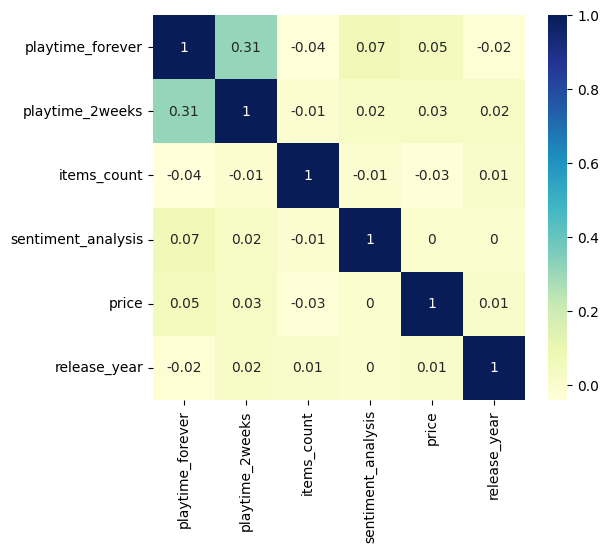

In [15]:
# Generamos un mapa de calor con las correlaciones de los datos
df_numerico = data.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(6,5))
#sns.heatmap(data=corr, annot=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## Buscamos valores atípicos 

Calculamos los límites inferior y superior para detectar valores atípicos utilizando el método IQR.

In [16]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]
valores_atipicos = valores_atipicos[["playtime_forever","price"]]
valores_atipicos.playtime_forever[valores_atipicos.playtime_forever.notnull()].head(5)

4      3464.0
11     5788.0
47    63438.0
51     2435.0
54     3692.0
Name: playtime_forever, dtype: float64

In [17]:
valores_atipicos.price[valores_atipicos.price.notnull()].head(5)

18483    99.99
18484    99.99
18485    99.99
18486    99.99
18487    99.99
Name: price, dtype: float64

### Nube de Palabras

Representación gráfica de la mayoria de veces que se presenta una palabra

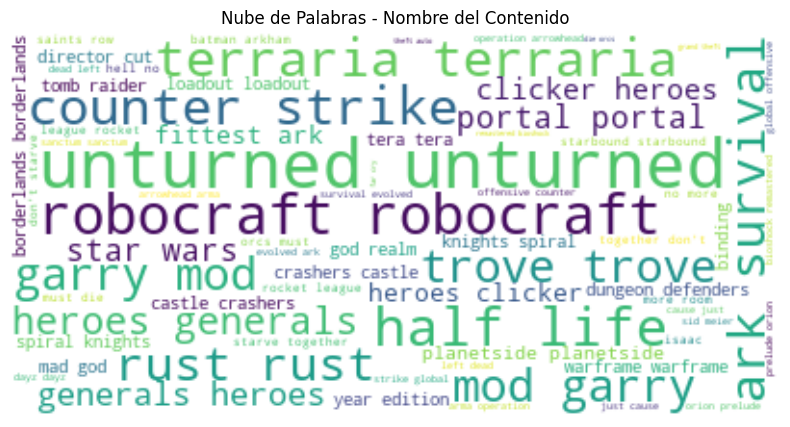

In [19]:
# Generamos una nube de palabras de la columna 'app_name'
title_words = ' '.join(data['app_name'].astype(str))
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Nombre del Contenido')
plt.show()

#Las palabras con mayor tamaño representan que tienen mayor frecuencia

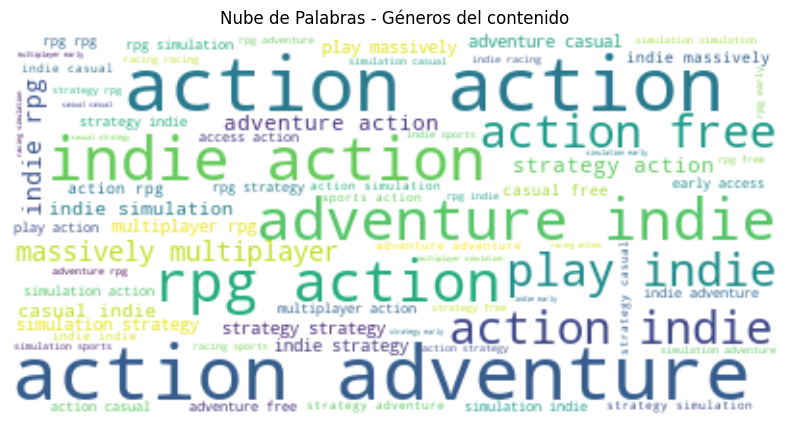

In [20]:
# Generamos una nube de palabras de la columna 'app_name'
title_words = ' '.join(data['genres'].astype(str))
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros del contenido')
plt.show()

### Gráfico de Histograma

Los siguientes gráficos nos muestran las distribución de valores dentro de su serie  

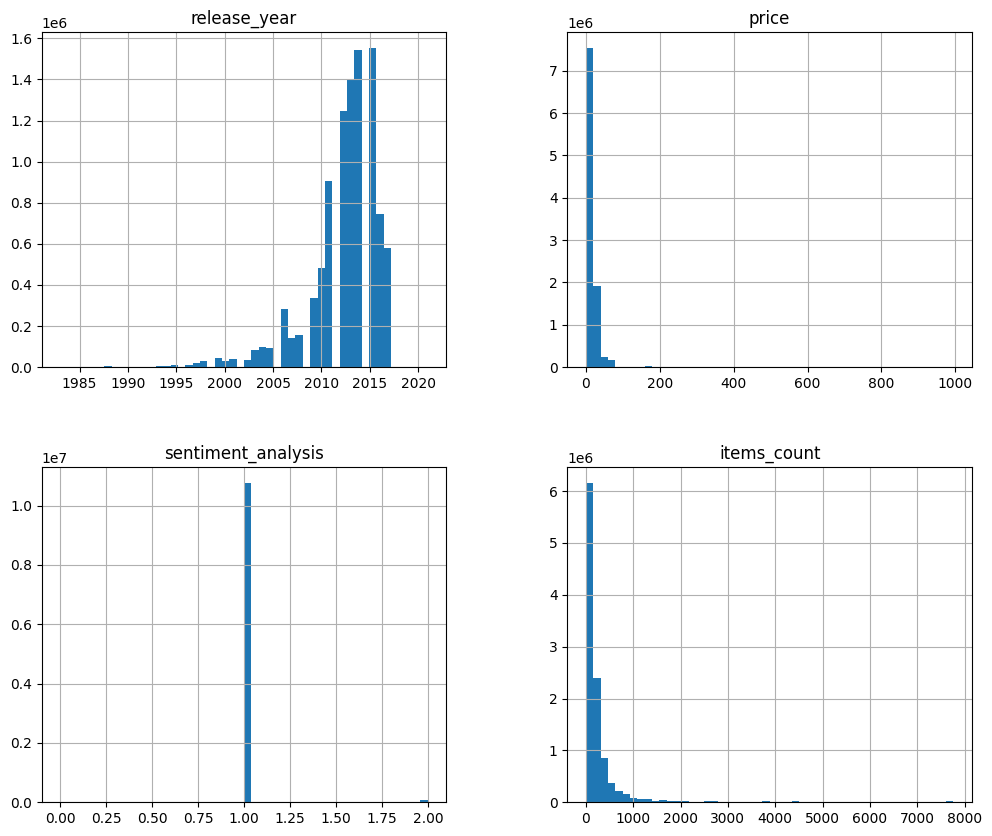

In [21]:
dataHisto=data[['release_year','price','sentiment_analysis','items_count']]
dataHisto.hist(bins = 50, figsize= (12,10))
plt.show()

Hay que tener en consideración que tras la consolidación de los Datasets al no presentar la misma cantidad de columnas se asignaron valores nulos a los restantes, por ejemplo si en la columna "sentiment analysis" no se hubiera considerado establecer como valor 1 cuando no exista reseña el gráfico representaría que la cantidad de reseñas positivas fueron más que las negativas y neutrales 

Text(0, 0.5, 'Frecuencia')

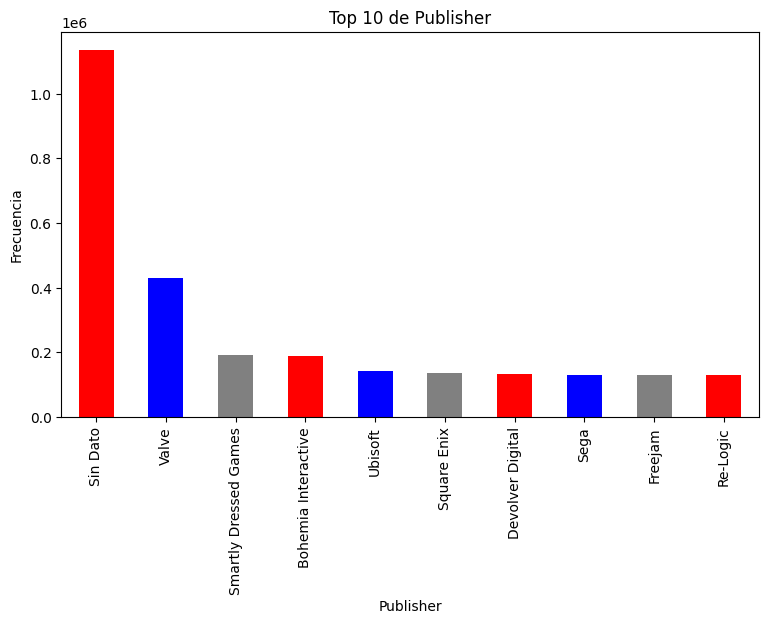

In [22]:
#Visualización de los principales Publishers 

data.publisher.value_counts(normalize=False)[:10].plot(kind='bar',title='Top 10 de Publisher',figsize=(9,5),color=['red','blue','gray'])
plt.xlabel('Publisher')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

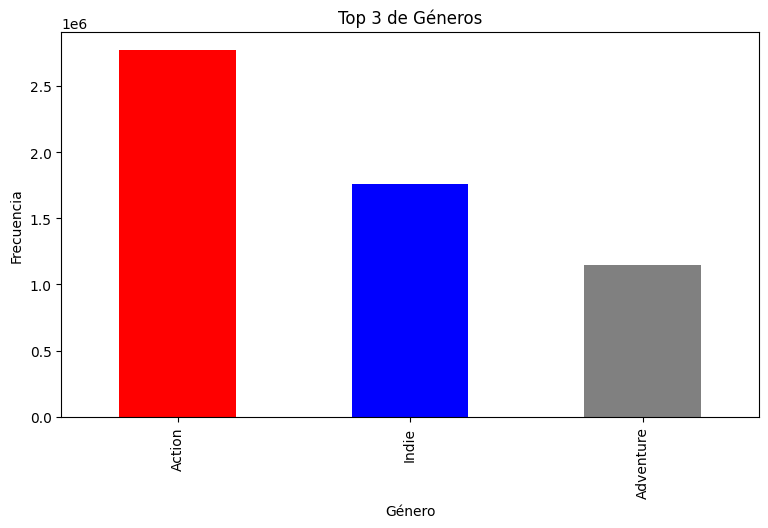

In [23]:
#Filming_location visualize the in the dataset

data['genres'].value_counts(normalize=False)[:3].plot(kind='bar',title='Top 3 de Géneros',figsize=(9,5),color=['red','blue','gray'])
plt.xlabel('Género')
plt.ylabel('Frecuencia')

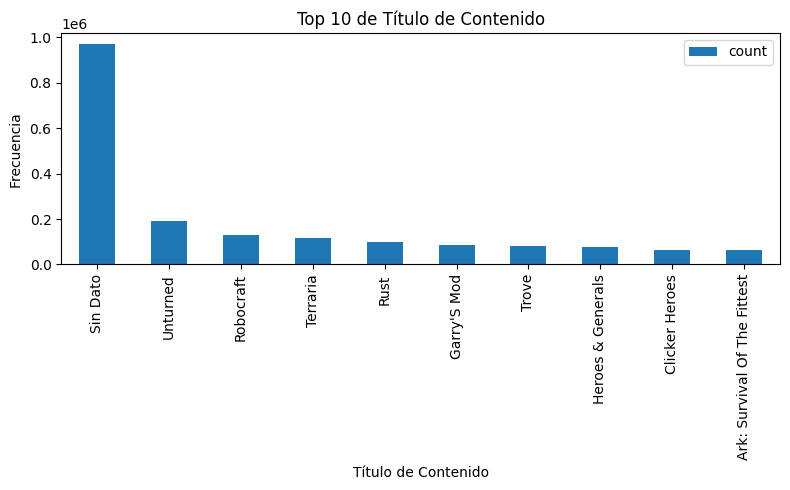

In [24]:
# Visualización por Titulo del contenido en el dataset

data['title'].value_counts()[:10].plot(kind='bar',title='Top 10 de Título de Contenido',figsize=(8,5))
plt.xlabel("Título de Contenido")
plt.ylabel("Frecuencia ")
plt.tight_layout()
plt.legend()
plt.show()

In [25]:
# Hacemos un conteo en la columna 'sentiment_analysis'

sentiment_counts = data['sentiment_analysis'].value_counts().sort_values(ascending=False)
print(sentiment_counts)

sentiment_analysis
1.0    10746449
2.0       83001
0.0       22242
Name: count, dtype: int64
